# OLG

In [210]:
%load_ext autoreload
%autoreload 2

import numpy as np
from modelproject import OLGModelClass
from scipy import optimize
from modelproject import simulate_before_s, simulate_after_s, find_s_bracket, calc_euler_error
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Description of the OLG-model with an Increasing Population and Non-Zero Probability of Premature Death

**We need to insert a full description of the model just like in the lecture notes**

Effectively this means that the probability of surviving is just an additional discount rate

# Population Growth

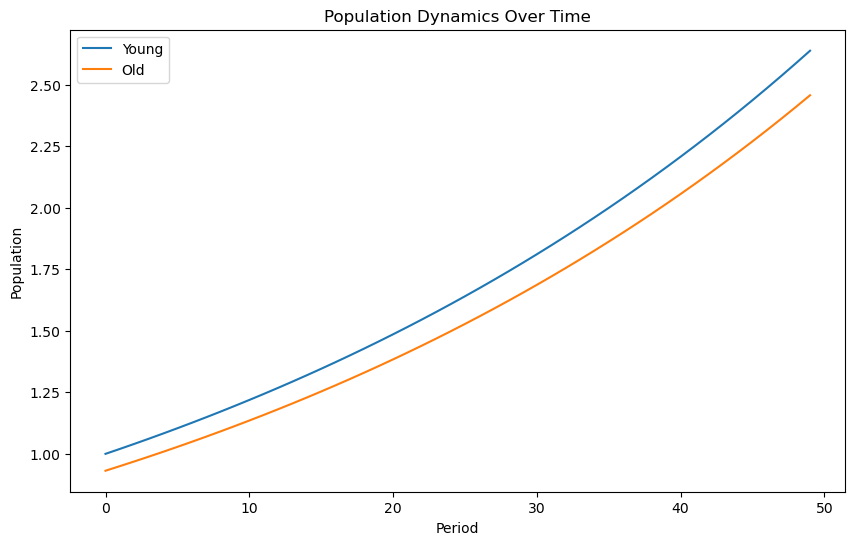

In [211]:
# a. create and simulate the model
model = OLGModelClass(do_print=False)
par = model.par
sim = model.sim

p = 0.95 # survival probability
par.n = 0.02 # population growth
par.p = np.full(par.simT, p) 

model.simulate(do_print=False)


# b. plot the populations over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.par.pop_young, label="Young")
plt.plot(range(model.par.simT), model.par.pop_old, label="Old")
plt.xlabel("Period")
plt.ylabel("Population")
plt.legend()
plt.title("Population Dynamics Over Time")
plt.show()

# Capital

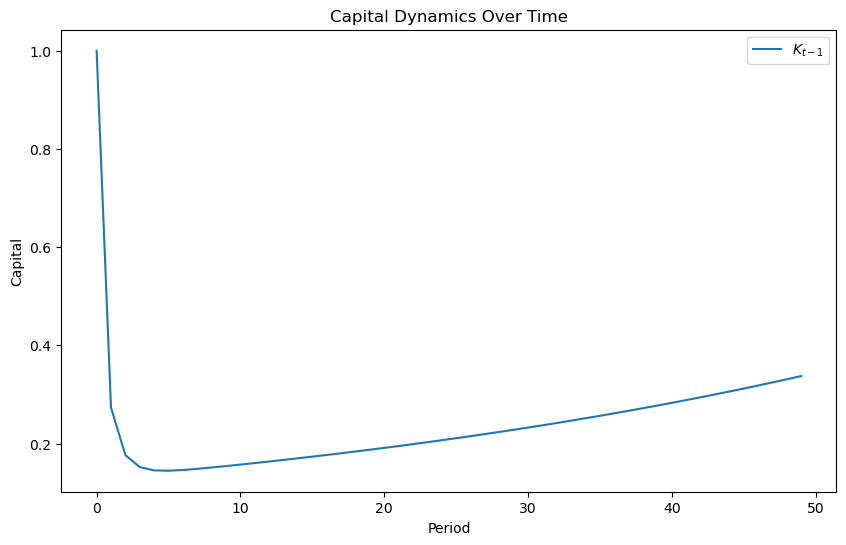

In [212]:
# a. plot the lagged capital over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag, label=r"$K_{t-1}$")
plt.xlabel("Period")
plt.ylabel("Capital")
plt.legend()
plt.title("Capital Dynamics Over Time")
plt.show()


# Capital Share of Income

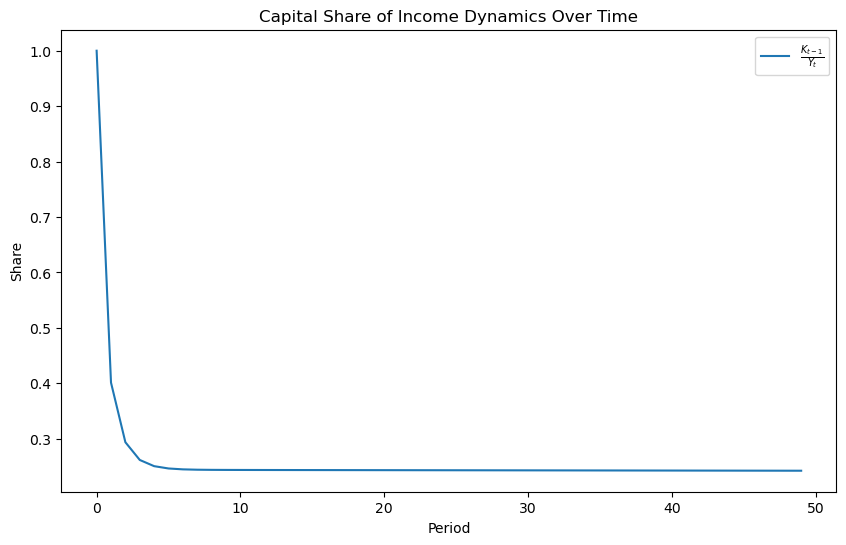

In [213]:
# a. plot the lagged capital share of income over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"$\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share")
plt.legend()
plt.title("Capital Share of Income Dynamics Over Time")
plt.show()

# Comparative Statistics

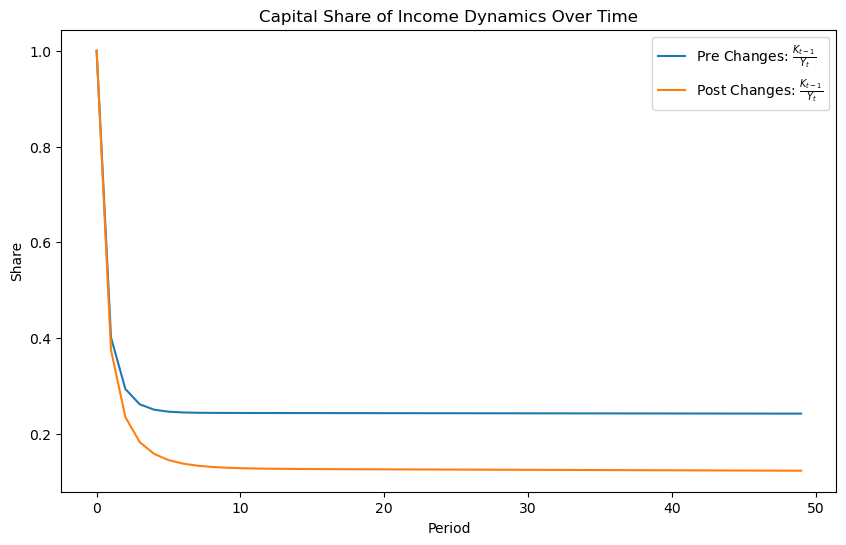

In [214]:
# a. parameter changes

# i. households
par.sigma = 1.75 # CRRA coefficient - decreased by 0.25
par.beta = 1/1.50 # discount factor - increased denominator by 0.1

# ii. firms
par.alpha = 0.40 # capital weight - increased by 0.1
par.theta = 0.1 # substitution parameter - increased by 0.05
par.delta = 0.30 # depreciation rat - decreased by 0.2

# iii. government
par.tau_w = 0.20 # labor income tax - increased by 0.1
par.tau_r = 0.10 # capital income tax - decreased by 0.1

# b. plot the lagged capital share of income pre and post the parameter changes
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"Pre Changes: $\frac{K_{t-1}}{Y_t}$")
model.simulate(do_print=False)
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"Post Changes: $\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share")
plt.legend()
plt.title("Capital Share of Income Dynamics Over Time")
plt.show()


# Pandemic

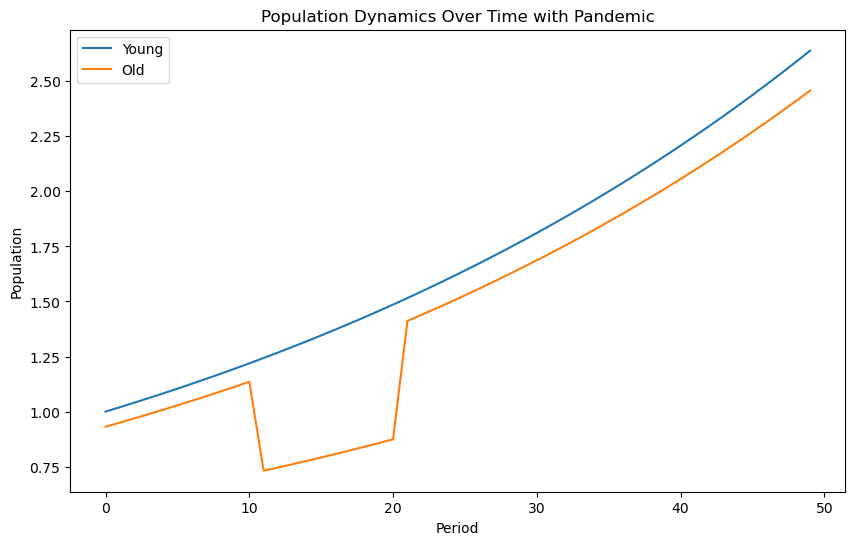

In [215]:
# a. create and simulate the model
model = OLGModelClass(do_print=False)
par = model.par
sim = model.sim 

p = 0.95 # survival probability
par.n = 0.02 # population growth
par.p = np.full(par.simT, p) 
par.p[10:20] = 0.6 # temporary pandemic decreases the survival probability
model.simulate(do_print=False)

# b. plot the populations over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.par.pop_young, label="Young")
plt.plot(range(model.par.simT), model.par.pop_old, label="Old")
plt.xlabel("Period")
plt.ylabel("Population")
plt.legend()
plt.title("Population Dynamics Over Time with Pandemic")
plt.show()


# Capital

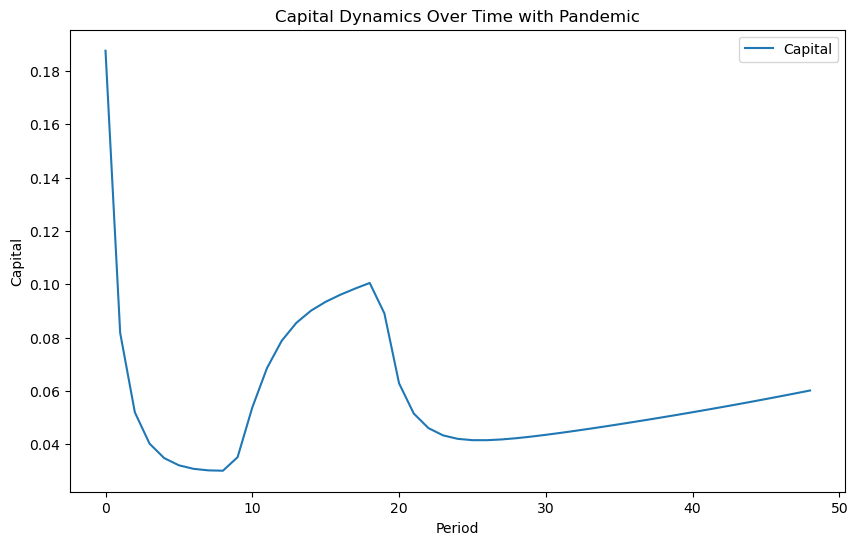

In [219]:
# a. plot the lagged capital over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K, label="Capital")
plt.xlabel("Period")
plt.ylabel("Capital")
plt.legend()
plt.title("Capital Dynamics Over Time with Pandemic")
plt.show()


# Capital Share of Income

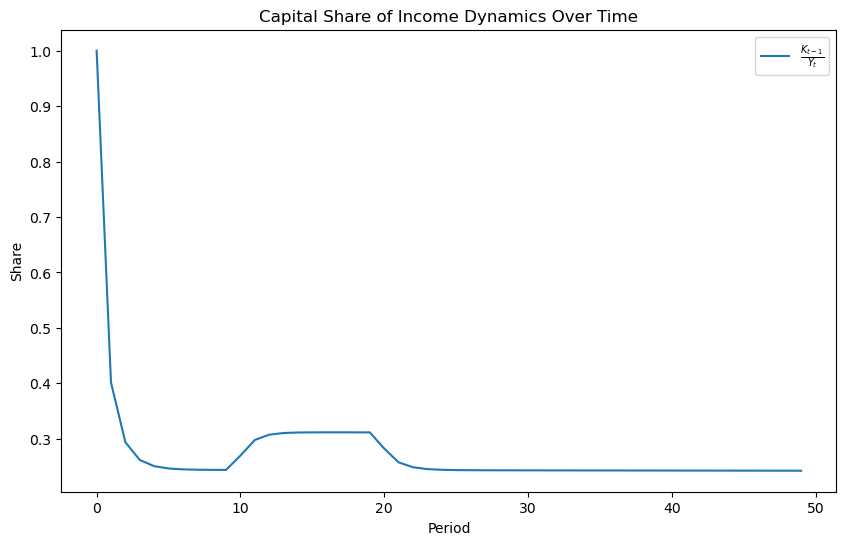

In [217]:
# a. plot the lagged capital share of income over time
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"$\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share")
plt.legend()
plt.title("Capital Share of Income Dynamics Over Time")
plt.show()

# Comparative Statistics

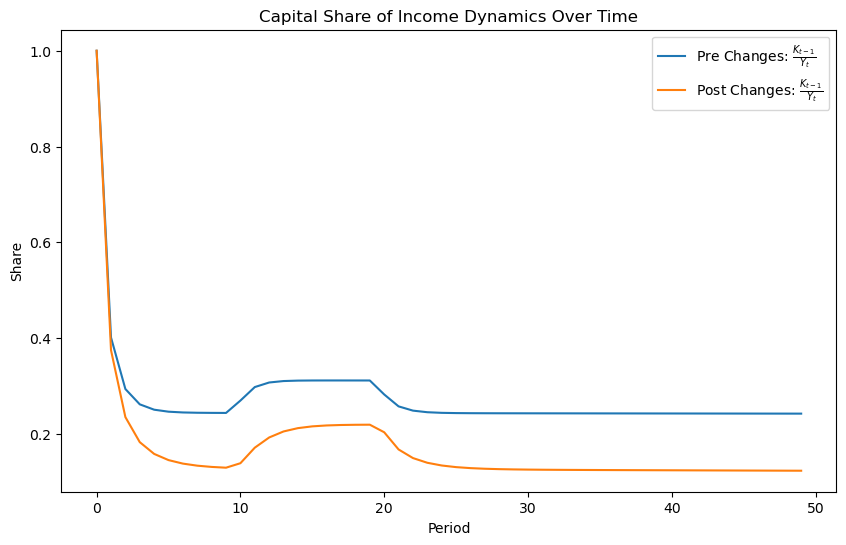

In [218]:
# a. parameter changes

# i. households
par.sigma = 1.75 # CRRA coefficient - decreased by 0.25
par.beta = 1/1.50 # discount factor - increased denominator by 0.1

# ii. firms
par.alpha = 0.40 # capital weight - increased by 0.1
par.theta = 0.1 # substitution parameter - increased by 0.05
par.delta = 0.30 # depreciation rat - decreased by 0.2

# iii. government
par.tau_w = 0.20 # labor income tax - increased by 0.1
par.tau_r = 0.10 # capital income tax - decreased by 0.1

# b. plot the lagged capital share of income pre and post the parameter changes
plt.figure(figsize=(10, 6))
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"Pre Changes: $\frac{K_{t-1}}{Y_t}$")
model.simulate(do_print=False)
plt.plot(range(model.par.simT), model.sim.K_lag/model.sim.Y, label=r"Post Changes: $\frac{K_{t-1}}{Y_t}$")
plt.xlabel("Period")
plt.ylabel("Share")
plt.legend()
plt.title("Capital Share of Income Dynamics Over Time")
plt.show()
